In [2]:
import cv2
import os
import re
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import csv
import pandas as pd
import keras
from keras import models,Model
from keras.layers import Dense,GaussianNoise, Dropout,Input
from keras.utils import np_utils
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
%matplotlib inline
from skimage.feature import hog
%matplotlib inline 

/home/jeet/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/jeet/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
dataSet = []
person = []
horiSet = []

count = 0
folder = "/home/jeet/ML face images train"
for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
#         print(img)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img = cv2.resize(img, (200,200))
        fd, img = hog(img,visualise=True)
        img = np.ravel(img)
        if img is not None:
            numbers = re.findall('\d+',filename)
            numbers = list(map(int,numbers))
            person.append(numbers[0])
            horiSet.append(img.T)
            dataSet.append(img)
            count = count + 1
           
        
dataSet_test = []
person_test = []
horiSet_test = []

folder = "/home/jeet/ML face images test"
for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img = cv2.resize(img, (200, 200))
        fd, img = hog(img, visualise=True)
        img = np.ravel(img)
        if img is not None:
            numbers = re.findall('\d+',filename)
            numbers = list(map(int,numbers))
            person_test.append(numbers[0])
            horiSet_test.append(img.T)
            dataSet_test.append(img)
            count = count + 1

/home/jeet/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [4]:
#Getting data in desired format and mapping the lables
dataSet = np.array(dataSet)
train = pd.DataFrame(dataSet)

person = np.array(person)
train['id'] = person.transpose()

unique_person = train['id']
unique_person = np.array(unique_person)
unique_person = np.unique(unique_person)
key = range(len(unique_person))

roll_dict = dict( zip(unique_person, key))

mapped_roll = np.vectorize(roll_dict.get)(person)
train['id'] = mapped_roll.transpose()

y = train['id'].values.astype('int64')
images = train.drop(['id'], axis=1, inplace=False)
x = (images.values).astype('uint8')

X_train = x
Y_train = y

dataSet_test = np.array(dataSet_test)
test = pd.DataFrame(dataSet_test)

person_test = np.array(person_test)
test['id'] = person_test.transpose()

mapped_roll_test = np.vectorize(roll_dict.get)(person_test)
test['id'] = mapped_roll_test.transpose()
print(test['id'])

temp = np_utils.to_categorical(test['id'])
print(temp[2])
print(temp.shape)


y_test = test['id'].values.astype('int64')
images = test.drop(['id'], axis=1, inplace=False)
x_test = (images.values).astype('uint8')

X_test = x_test
Y_test = y_test

0      29
1      32
2       4
3      14
4      34
5      35
6      25
7      29
8       6
9      18
10     25
11     19
12     21
13     24
14     28
15     33
16     10
17      2
18      7
19      9
20     23
21     31
22     15
23     12
24      6
25     21
26     20
27      8
28     26
29     34
       ..
110    35
111    31
112    15
113    23
114    17
115     9
116    33
117    19
118    26
119    33
120    23
121    18
122    27
123    14
124    10
125     0
126    20
127    31
128     6
129    17
130    34
131     8
132    35
133    26
134    18
135     6
136    30
137    14
138     9
139    13
Name: id, Length: 140, dtype: int64
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(140, 36)


In [5]:
#Defining and training of the neural neural network
model = models.Sequential()
layers = 2
units = 256

#Input layer
model.add(Dense(units, input_dim=40000, activation='relu'))

#Hidden Layer
for i in range(layers):
    model.add(Dense(72, activation='relu'))
    model.add(Dropout(0.1))
    
#Output layer
model.add(Dense(36, activation='softmax'))

#Building model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Training model
model.fit(X_train,Y_train,batch_size=70,validation_split=0.2,epochs=150,verbose=2)

Train on 334 samples, validate on 84 samples
Epoch 1/150
 - 2s - loss: 11.0957 - acc: 0.0240 - val_loss: 12.5449 - val_acc: 0.0000e+00
Epoch 2/150
 - 1s - loss: 10.3771 - acc: 0.0599 - val_loss: 6.2734 - val_acc: 0.0714
Epoch 3/150
 - 1s - loss: 4.7831 - acc: 0.0808 - val_loss: 3.5565 - val_acc: 0.0476
Epoch 4/150
 - 1s - loss: 3.4939 - acc: 0.0629 - val_loss: 3.4720 - val_acc: 0.0238
Epoch 5/150
 - 1s - loss: 3.3521 - acc: 0.0838 - val_loss: 3.3946 - val_acc: 0.0476
Epoch 6/150
 - 1s - loss: 3.2511 - acc: 0.0778 - val_loss: 3.3135 - val_acc: 0.0714
Epoch 7/150
 - 1s - loss: 3.1844 - acc: 0.1018 - val_loss: 3.3146 - val_acc: 0.0833
Epoch 8/150
 - 1s - loss: 3.1427 - acc: 0.0928 - val_loss: 3.3432 - val_acc: 0.0595
Epoch 9/150
 - 1s - loss: 3.0791 - acc: 0.1078 - val_loss: 3.2651 - val_acc: 0.0833
Epoch 10/150
 - 1s - loss: 2.9562 - acc: 0.1557 - val_loss: 3.1945 - val_acc: 0.1071
Epoch 11/150
 - 1s - loss: 2.8975 - acc: 0.1677 - val_loss: 3.3805 - val_acc: 0.1190
Epoch 12/150
 - 1s - l

Epoch 97/150
 - 1s - loss: 0.8719 - acc: 0.7275 - val_loss: 2.3995 - val_acc: 0.4762
Epoch 98/150
 - 1s - loss: 0.8157 - acc: 0.7635 - val_loss: 2.1582 - val_acc: 0.4881
Epoch 99/150
 - 1s - loss: 0.8414 - acc: 0.7515 - val_loss: 2.3208 - val_acc: 0.5119
Epoch 100/150
 - 1s - loss: 0.7009 - acc: 0.7725 - val_loss: 2.3398 - val_acc: 0.4762
Epoch 101/150
 - 1s - loss: 0.7736 - acc: 0.7605 - val_loss: 2.4930 - val_acc: 0.4524
Epoch 102/150
 - 1s - loss: 0.9109 - acc: 0.7575 - val_loss: 2.3775 - val_acc: 0.4524
Epoch 103/150
 - 1s - loss: 0.8351 - acc: 0.7784 - val_loss: 2.3026 - val_acc: 0.4048
Epoch 104/150
 - 1s - loss: 0.6651 - acc: 0.8084 - val_loss: 2.3512 - val_acc: 0.4643
Epoch 105/150
 - 1s - loss: 0.7232 - acc: 0.7934 - val_loss: 2.4222 - val_acc: 0.4762
Epoch 106/150
 - 1s - loss: 0.6952 - acc: 0.8054 - val_loss: 2.3703 - val_acc: 0.4167
Epoch 107/150
 - 1s - loss: 0.6901 - acc: 0.7844 - val_loss: 2.1205 - val_acc: 0.5000
Epoch 108/150
 - 1s - loss: 0.7832 - acc: 0.7754 - val_lo

In [11]:
predictions = model.predict_classes(X_test, verbose=0)

def write_predictions(predictions, fname):
    pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)), "id": predictions}).to_csv(fname, index=False, header=True)

write_predictions(predictions, "out.csv")


In [12]:
result = pd.read_csv('out.csv')
result = result['id']
result = np.array(result)
error = np.array(Y_test - result)
error = error[error != 0]
error = error.size/Y_test.size

print('Accuracy : ',1-error)

result

Accuracy :  0.5857142857142856


array([24, 34,  4,  5, 34, 35, 27, 10, 28, 31, 25, 19, 21, 15, 28,  0,  8,
        2, 31, 21, 23,  0, 15, 12,  6, 21, 20,  8, 21, 31,  4,  4, 22,  1,
       30, 13, 21, 22, 31, 16, 17, 21, 15, 13, 22, 16,  2, 31,  0,  8,  8,
       17, 19, 16, 27,  8, 24, 18,  9, 13, 12, 13,  8, 30, 29, 27,  8, 24,
       11, 21, 20, 16, 19, 13, 31, 16, 35, 29, 16,  1, 16, 28,  3, 28, 21,
       34, 22,  0, 29, 22,  8,  7, 24, 26, 10, 32, 35, 12, 14,  0, 30,  0,
       27,  8, 10, 28,  0, 13,  4, 31, 35, 16, 15,  0, 17, 29, 21, 19, 26,
       33,  6, 31, 27, 14, 10,  0, 31, 13, 28, 17, 34,  8, 35, 26, 18,  6,
       30, 14, 30, 13])

In [13]:
score = model.predict_proba(X_test)


Average precision score, micro-averaged over all classes: 0.63


/home/jeet/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:444: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


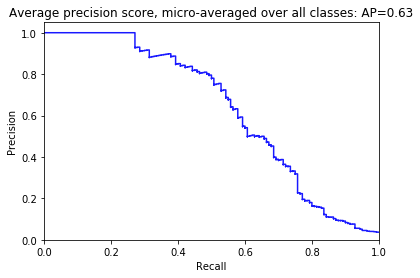

In [19]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(36):
    precision[i], recall[i], _ = precision_recall_curve(temp[:, i],
                                                        score[:, i])
    average_precision[i] = average_precision_score(temp[:, i], score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(temp.ravel(),
    score.ravel())
average_precision["micro"] = average_precision_score(temp, score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

fig = plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.9,
         where='post')
#plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
#                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))
plt.show()
fig.savefig('HOG-ANN.png',dpi=100)